# Week 4 - Neural Networks

This week we will cover neural networks, an AI model inspired by how the brain works. The topics we'll cover this week are:

* Motivations
  * Non-linear Hypotheses
  * Neurons and the Brain
* Neural Networks
  * Model Representation
* Applications
  * Examples and Intuitions
  * Multiclass Classification
  
## Motivations

### Non-linear Hypotheses

Why do we need another algorithm? We already have linear and logistic regressions. The issue arises when we need to implement non-linear hypotheses. This is going to be a particular issue when we increase the number of features fed into our model. More features also begins to get more computationally expensive for our regression algorithms, especially if we implement the feature mapping to higher order polynomials. For a set of 100 features, if we map those 100 features to all possible quadratic combinations, we get roughly 5,000 features. We say this is of the order

$$\mathcal{O} \Big(\frac{n^2}{2}\Big).$$

And if we bump the degree up to cubic combinations of the 100 features, we're looking at roughly 170,000 new features, which is roughly

$$\mathcal{O} (n^3).$$

We'll often be looking at machine learning problems with large numbers of features. Let's consider computer vision, where we want to examine an image and determine if a car is present in the picture. The dimension of the feature space for an image is the number of pixels in the image. Therefore, if we're looking at a small image, say 50 by 50 pixels, we have 2,500 features. And that's just for a greyscale image! If it's an RGB image, then we're at 7,500 pixels. For our 50 by 50 greyscale image, a quadratic mapping would yield roughly 3 million features. This would be very expensive. So linear/logistic regressions is not a great way to approach the problem of computer vision.

### Neurons and the Brain

The initial goal of neural networks was to create an algorithm that mimics the brain. These algorithms were popular in the 80s and 90s, but diminished in the 90s. Lately, they've had a resurgence, partly because computers have become advanced enough to handle large neural networks.

There is a hypothesis that the brain, rather than using many different "programs", it only uses one. Take the auditory cortex. It's what interprests the transmitted signals your ear recieves so that you can understand sound. Researchers have performed experiments where they've rewired the brain such that the auditory cortex recieved signals instead from the eye. And it turns out that the auditory cortex learns how to see. Another similar example is the somatosensory cortex, which interprets the sensation of touch, which can also be rewired to learn to see instead. The main takeaway here is that, within reason, the brain will learn how to deal with whatever "data" is being passed to it.

## Neural Networks

### Model Representation, Part 1

We'll now cover how we represent a model using neural networks. Let's start by looking at what a single neuron in the brain looks like. 

![Image of a neuron](./neuron.png "Image of a neuron")

The dendrite behaves like an "input wire", while the axon behaves like an "output wire" which sends a message to other neurons. At a simplistic level, the neuron is a computational unit that gets a number of input through input wires, does some computation, than sends outputs via its axon to other nodes or neurons in the brain.

If a neuron wants to send information to another neuron, it does so by sending an electric pulse from the axon of one neuron to the dendrite of another neuron. Below is some code to show a representation of a neural network. 

Note that we usually don't include the $x_0$ element. Here, we call this the "bias unit".

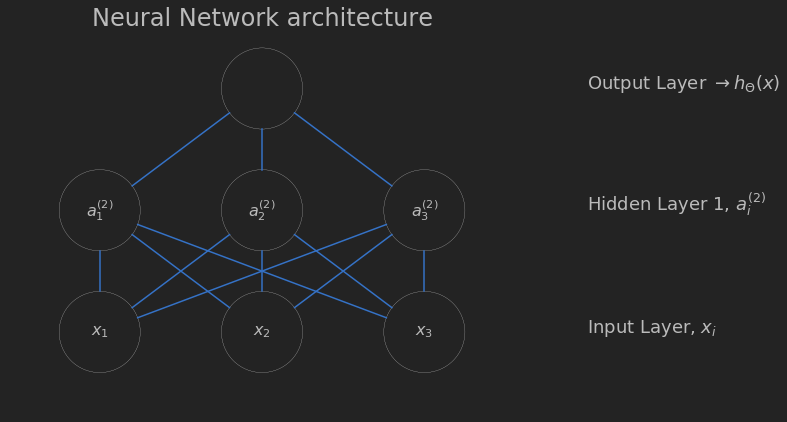

In [2]:
# Import neural network code stored locally and plot a simple NN diagram
import neural_network
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False);
network = neural_network.DrawNN([3,3,1])
network.draw()

In our neural network model, we have the following:
* $a_i^{(j)}$, the "activation" of unit $i$ in layer $j$
* $\Theta^{(j)}$, the matrix of weights controlling function mapping from layer $j$ to layer $j+1$

In neural networks, we use the same logistic function from before,

$$
g(z) = \frac{1}{1 + \exp(-z)}
$$

which we will sometimes call a "sigmoid activation function". In this situation, we often refer to our parameters as "weights". For our $n=3$ example as shown above:

$$
\begin{align}
a_1^{(2)} & = g \big( \Theta_{1,0}^{(1)} x_0 + \Theta_{1,1}^{(1)} x_1 + \Theta_{1,2}^{(1)} x_2 + \Theta_{1,3}^{(1)} x_3 \big) \\
a_2^{(2)} & = g \big( \Theta_{2,0}^{(1)} x_0 + \Theta_{2,1}^{(1)} x_1 + \Theta_{2,2}^{(1)} x_2 + \Theta_{2,3}^{(1)} x_3 \big) \\
a_3^{(2)} & = g \big( \Theta_{3,0}^{(1)} x_0 + \Theta_{3,1}^{(1)} x_1 + \Theta_{3,2}^{(1)} x_2 + \Theta_{3,3}^{(1)} x_3 \big) \\
\end{align}
$$

Since we're mapping 3 input units to 3 hidden units (and we have to include $x_0$), our matrix is

$$ \Theta^{(1)} \in \mathbb{R}^{3 \times 4} $$

Stated otherwise, the rule is that if the network has $s_j$ units in layer $j$ and $s_{j+1}$ units in layer $j+1$, then

$$ \Theta^{(j)} \in \mathbb{R}^{s_{j+1} \times (s_j +1)} $$

Our hypothesis layer can be written as

$$ h_\Theta (x) = a_1^{(3)} =  g \big( \Theta_{1,0}^{(2)} a_0^{(2)} + \Theta_{1,1}^{(2)} a_1^{(2)} + \Theta_{1,2}^{(2)} a_2^{(2)} + \Theta_{1,3}^{(2)} a_3^{(2)} \big) $$

### Model Representation, Part 2

Let's use the following notation, using our $n=$ example again:

$$ z_i^{(2)} = \Theta_{i,0}^{(1)} x_0 + \Theta_{i,1}^{(1)} x_1 + \Theta_{i,2}^{(1)} x_2 + \Theta_{i,3}^{(1)} x_3 $$

and thus

$$ a_i^{(2)} = g ( z_i^{(2)} ) $$

So now we can have some vectorized notation:

$$x = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ x_3 \end{bmatrix},
z^{(2)} = \begin{bmatrix} z_1^{(2)} \\ z_2^{(2)} \\ z_3^{(2)} \end{bmatrix} \\
\Rightarrow z^{(2)} = \Theta^{(1)} x , \text{ and }
a^{(2)} = g( z^{(2)} )$$

Furthermore, we can thing of the input as the "first activation later", so we can rewrite the following

$$ z^{(2)} = \Theta^{(1)} x =  \Theta^{(1)} a^{(1)} $$

We're currently missing the value of 

$$a_0^{(2)}$$

but we'll refer to the as the "bias unit of hidden layer 1" and set this equal to 1 just like in the input layer.

Finally to compute the value of the hypothesis, we compute 

$$ z^{(3)} = \Theta^{(2)} a^{(2)} $$

and then

$$ h_\Theta (x) = a^{(3)} = g (z^{(3)}) .$$

What the neural network is doing is exactly like our logistic regression. The only difference is that it adds an additional step so instead of using the raw input features, to map to another set of parameters to learn its own features to then feed into logistic regression.

It's important to note that we can add different layers and vary the archetecture of the model. So we may have something that looks more like the following: 

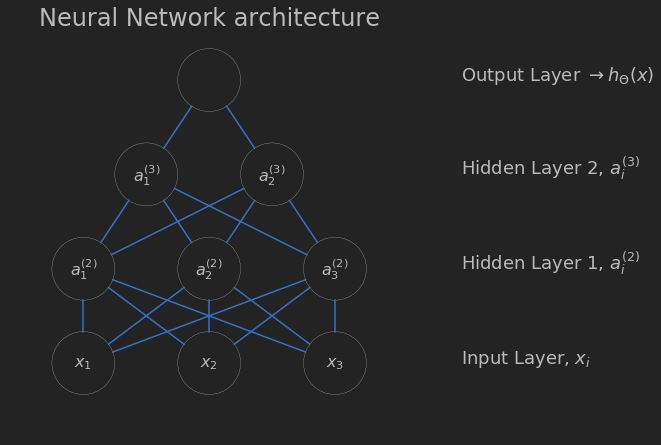

In [3]:
# Import neural network code stored locally and plot a simple NN diagram
import neural_network
network = neural_network.DrawNN([3,3,2,1])
network.draw()

## Applications

### Examples and Intuitions, Part 1, XOR/XNOR

We'll now cover an example to get a sense if why neural networks are useful for learning on complex non-linear hypotheses. Let's say we have binary features

$$ x_1, x_2 \in \{0,1\} $$

we'd like to create a non-linear division boundary that will separate when the features look something like the following:

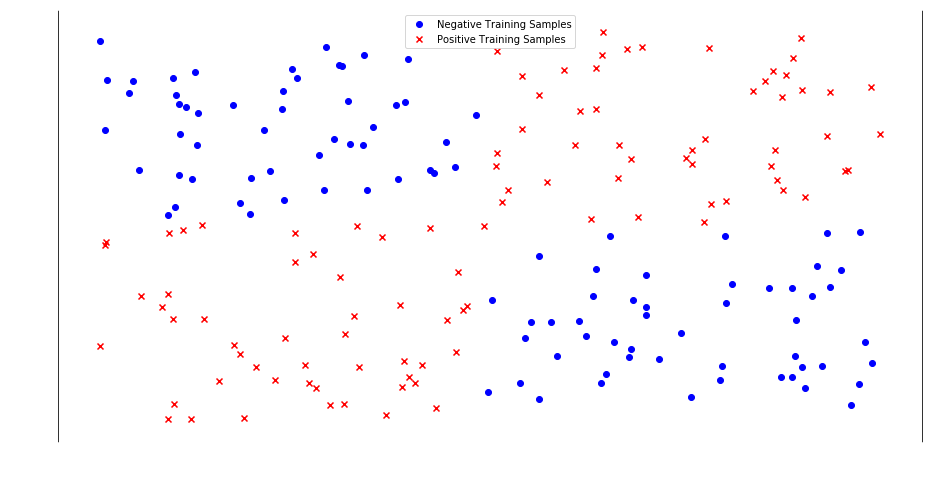

In [49]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt

# Create random arrays that fit a checkerboard pattern
x1neg = np.concatenate((0.5*np.random.rand(50),0.5*np.random.rand(50)+0.5))
x2neg = np.concatenate((0.5*np.random.rand(50),0.5*np.random.rand(50)+0.5))
x1pos = np.concatenate((0.5*np.random.rand(50)+0.5,0.5*np.random.rand(50)))
x2pos = np.concatenate((0.5*np.random.rand(50),0.5*np.random.rand(50)+0.5))

# Plot data
fig=plt.figure(figsize=(12,6));
ax=fig.add_axes([0,0,1,1]);
ax.scatter(x1pos,x2pos,color='blue',marker="o");
ax.scatter(x1neg,x2neg,color='red',marker="x");
ax.set_xlabel('$x_1$',fontsize=24);
ax.set_ylabel('$x_2$',fontsize=24);
ax.legend(("Negative Training Samples","Positive Training Samples"));
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

To simplify, let's say we have the following case of just four points:

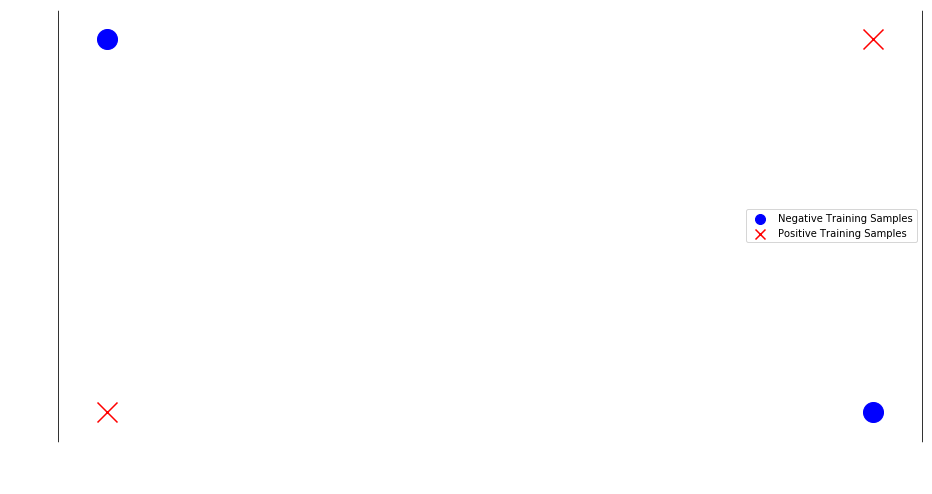

In [50]:
# Create random arrays that fit a checkerboard pattern
x1neg = np.array([0,1])
x2neg = np.array([0,1])
x1pos = np.array([0,1])
x2pos = np.array([1,0])

# Plot data
fig=plt.figure(figsize=(12,6));
ax=fig.add_axes([0,0,1,1]);
ax.scatter(x1pos,x2pos,color='blue',marker="o",s=400);
ax.scatter(x1neg,x2neg,color='red',marker="x",s=400);
ax.set_xlabel('$x_1$',fontsize=24);
ax.set_ylabel('$x_2$',fontsize=24);
ax.legend(("Negative Training Samples","Positive Training Samples"),markerscale=0.5);
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

This can be stated mathematically as

$$ 
\begin{align}
y &= x_1 \text{ XNOR } x_2 \\
& = \text{NOT} x_1 \text{ XOR } x_2.
\end{align}
$$

The XOR connective yields true when exactly one condition is true. Using logic notation, the XOR connective works as such:

$$
\begin{align}
A \text{ XOR } B & = (A \land B) \lor (!A \land !B) \\
\end{align}
$$

The XNOR connective is true when two arguments agree exactly, that is, when both are true or both are false. In logic notation

$$
\begin{align}
A \text{ XNOR } B & = (A \land ! B) \lor (!A \land B) \\
& = (A \lor B ) \land (! A \lor !B)
\end{align}
$$

#### Sub-example: AND Function

Let's start with a simple example, using the AND connector, so 

$ y = x_1 \land x_2 $

Let's say that our paramters work to multiply 
* $x_0$ by -30
* $x_1$ by 20
* $x_2$ by 20

Our hypothesis here is then

$$ h_\Theta (x) = g ( -30 + 20 x_1 + 20 x_2 ) $$

For the four possible outcomes, we get

$x_1$ | $x_2$ | $h_\Theta (x)$
--- | --- | ---
0 | 0 | $g(-30) \approx 0$
0 | 1 | $g(-10) \approx 0$
1 | 0 | $g(-10) \approx 0$
1 | 1 | $g(+10) \approx 1$

and this works exactly like a truth table for the AND logic gate. 

#### Sub-example: OR Function

For an OR truth table, we could use paramters to multiply 
* $x_0$ by -10
* $x_1$ by 20
* $x_2$ by 20

to get the following:

$x_1$ | $x_2$ | $h_\Theta (x)$
--- | --- | ---
0 | 0 | $g(-10) \approx 0$
0 | 1 | $g(10) \approx 1$
1 | 0 | $g(10) \approx 1$
1 | 1 | $g(+30) \approx 1$

#### Sub-example: NOT function

For an NOT $x_1$ truth table, we could use paramters to multiply 
* $x_0$ by 10
* $x_1$ by -20

to get the following:

$x_1$ | $h_\Theta (x)$
--- | ---
0 | $g(10) \approx 0$
1 | $g(-10) \approx 1$

#### Sub-example: NOT AND NOT function

Now we want to get a truth table for 

$$ !x_1 \land !x_2 $$

We could use paramters to multiply 
* $x_0$ by 10
* $x_1$ by -20
* $x_2$ by -20

to get the following:

$x_1$ | $x_2$ | $h_\Theta (x)$
--- | --- | ---
0 | 0 | $g(10) \approx 1$
0 | 1 | $g(-10) \approx 0$
1 | 0 | $g(-10) \approx 0$
1 | 1 | $g(-30) \approx 0$

#### Putting it all together for XNOR

We, for our XNOR function, want something that works more like

$x_1$ | $x_2$ | $h_\Theta (x)$
--- | --- | ---
0 | 0 | 1 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
0 | 1 | 0
1 | 0 | 0
1 | 1 | 1

Let's set one mapping (set of parameters) for the AND function;

$$a_1^{(2)} = -30 + 20 x_1 + 20 x_2$$

and another for the NOT AND NOT function;

$$a_2^{(2)} = 10 - 20 x_1 - 20 x_2$$

so that now we have

$x_1$ | $x_2$ | $a_1^{(2)}$ | $a_2^{(2)}$
--- | --- | --- | ---
0 | 0 | 0 &nbsp; &nbsp; | 1 &nbsp; &nbsp;
0 | 1 | 0 | 0 
1 | 0 | 0 | 0 
1 | 1 | 1 | 0 

And finally, our output will map with the weights for the OR function as such:

$$ h_\Theta (x) = a_1^{(3)} = - 10 + 20 a_1^{(2)} + 20 a_2^{(2)}$$

which would give

$x_1$ | $x_2$ | $a_1^{(2)}$ | $a_2^{(2)}$ | $h_\Theta (x)$ |
--- | --- | --- | --- | ---
0 | 0 | 0 &nbsp; &nbsp; | 1 &nbsp; &nbsp; | 1 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
0 | 1 | 0 | 0 | 0
1 | 0 | 0 | 0 | 0
1 | 1 | 1 | 0 | 1

So the complexity in neural networks really comes from the multiple layers embedded in the neural network architecture.

### Multiclass Classification

For multiclass classification, we're again going to use our one-vs-all comparison. As an example, say we are trying to identify whether, in an image, there is a 
1. pedestrian,
2. car,
3. motorcycle, or
4. truck

We want our NN to have output as such:

$$ h_\Theta (x) \approx \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} \text{ when pedestrian, }
   \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} \text{ when car, }
   \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} \text{ when motorcycle, }
   \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} \text{ when truck} $$
   
Our training data set will also look the same, rather than being single valued as in the last example. So our architecture may look like the following:

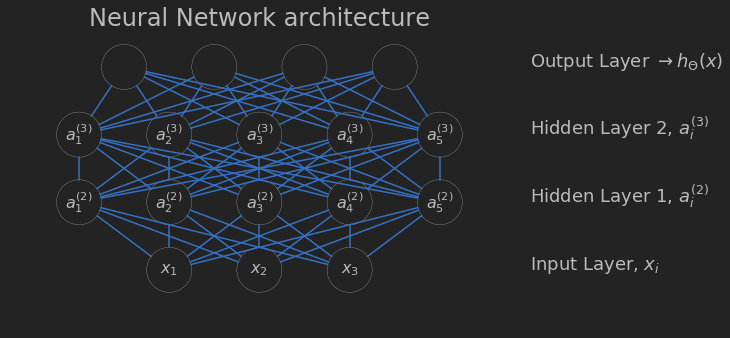

In [4]:
# Import neural network code stored locally and plot a simple NN diagram
import neural_network
network = neural_network.DrawNN([3,5,5,4])
network.draw()

## Quiz check
I wanted to check my answer on a quiz question to see if swapping the order of weights matters for the final output. Since the mapping occurs onto all elements, I don't think it should matter so long as the order is swapped for every layer in the same matter.

In [52]:
# Order 1
Theta1 = np.array([[1,1,2.4],[1,1.7,3.2]])
x = [1,2,3]
a2 = np.concatenate((np.array([1]),np.matmul(Theta1,x)))
Theta2 = np.array([1,0.3,-1.2])
a3_order1 = np.matmul(Theta2,a2)

# Order 2
Theta1 = np.array([[1,1.7,3.2],[1,1,2.4]])
x = [1,2,3]
a2 = np.concatenate((np.array([1]),np.matmul(Theta1,x)))
Theta2 = np.array([1,-1.2,0.3])
a3_order2 = np.matmul(Theta2,a2)

# Check if the results are the same
if a3_order1 == a3_order2:
    print("The order doesn't matter!")

The order doesn't matter!
